## Semester 1 Project Submission

Please fill out:
* Student name: 
* Instructor name: 


# Maanik Gupta

# Maya Sandlin

# Robert Golden

# Daniel Robles

# Jake Umholtz 

## Business Understanding:

Assisting Computing Vision's new movie studio in deciding on what type of films they ought to create.

Stakeholder:

Computing Vision and their new movie studio.

Problem:

Computing Vision's new movie studio does not know what type of films they should create.

Value:

We measure of success is box office performance in terms of currency. We chose this measure of success because Computing Vision's movie studio is a brand new portion of their business, therefore the first priority of the new business to it generate actionable revenue by having early box office success. 


## Data Understanding

Data sources:

The data is from popular industry related services including: Box Office Mojo, a website that tracks box-office revenue; IMDB, the internet movie database; Rotten Tomatoes, a movie review website; The Movie DB, a database of films; and The Numbers, a data website that tracks box office revenue and other industry related information. 

Our primary data source is the Box Office Mojo dataset. We chose this source as it contained the necessary information regarding box office performance.

Rationale: The necessary Python libraries for performing data and statistical analysis.

In [25]:
import numpy as np
import scipy as sp
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import math
import sqlite3

Rationale: Importing the data sources as variables to conduct data and statistical analysis.

In [26]:
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv')
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.csv')
rt_reviews = pd.read_csv('zippedData/rt.reviews.csv', encoding='unicode_escape')
tn_movie_budgets = pd.read_csv('zippedData/tn.movie_budgets.csv')
tmdb_movies = pd.read_csv('zippedData/tmdb.movies.csv', index_col=0)

In [27]:
# there are 1560 records in this dataset
original_rt_movie_info = pd.read_csv('zippedData/rt.movie_info.csv')
original_rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [28]:
#quickly visualizing the dataframe 
original_rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,9-Oct-71,25-Sep-01,NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,17-Aug-12,1-Jan-13,$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,13-Sep-96,18-Apr-00,NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,9-Dec-94,27-Aug-97,NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [29]:
# counting the total number of null values in the dataset
print(original_rt_movie_info.isnull().sum())

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64


In [30]:
# counting the none-null values in the box_office column
original_rt_movie_info['box_office'].count()

340

In [31]:
# counting the none-null values in the runtime column
original_rt_movie_info['runtime'].count()

1530

Rationale: By cleaning rt_movie_info, it allows us to before data and statistical analysis on the data within the dataset. This data set is important for our business insights and recommendations as it contains the information related to run time of movies. 

In [32]:
#Clean synopsis, rating, genre, director, writer, theater_date, dvd_date, runtime

rt_movie_info = rt_movie_info.dropna()
# dropping the null values because the data set is large enough at over 1500 records to handle the loss of data
# the data is also highly varied 
# However, it is important to note that by doing this we will data
box_office = []
for v in rt_movie_info['box_office'].dropna():
    box_office.append(box_office)



In [33]:

runtime_raw = []
runtime_clean = []
box_off_raw = []
box_off_clean = []
for val in rt_movie_info['runtime'].str[:3]: #extract first 3 characters, movies under 100 min will have whitespace
    runtime_raw.append(val)
for val in runtime_raw: #strip whitespace
    runtime_strip = val.replace(' ', '')
    runtime_clean.append(runtime_strip)
    
for val in rt_movie_info['box_office']:
    box_off_strip = val.replace(',', '')
    box_off_clean.append(box_off_strip)



rt_movie_info['runtime_clean'] = runtime_clean
rt_movie_info['box_office_clean'] = box_off_clean


In [34]:
# sanity check on null values
print(rt_movie_info.isnull().sum())

id                  0
synopsis            0
rating              0
genre               0
director            0
writer              0
theater_date        0
dvd_date            0
currency            0
box_office          0
runtime             0
studio              0
runtime_clean       0
box_office_clean    0
dtype: int64


In [35]:
rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,runtime_clean,box_office_clean
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,17-Aug-12,1-Jan-13,$,"600,000",108 minutes,Entertainment One,108,600000
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,11-Jan-02,18-Jun-02,$,"41,032,915",82 minutes,Paramount Pictures,82,41032915
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,27-Apr-06,2-Oct-07,$,"224,114",123 minutes,Sony Pictures Classics,123,224114
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,17-Dec-10,5-Apr-11,$,"1,039,869",108 minutes,ATO Pictures,108,1039869
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,25-Dec-13,1-Apr-14,$,"20,518,224",127 minutes,Universal Pictures,127,20518224


In [36]:
# checking the descriptive statistics
rt_movie_info['box_office_clean'].describe()

count          235
unique         235
top       10572742
freq             1
Name: box_office_clean, dtype: object

In [37]:
# checking the descriptive statistics
rt_movie_info['runtime_clean'].describe()

count     235
unique     69
top        91
freq       10
Name: runtime_clean, dtype: object

In [38]:
# turing the object in the cleaned columns into integers

rt_movie_info['box_office_clean'].astype(int)

1         600000
6       41032915
7         224114
15       1039869
18      20518224
          ...   
1530    72700000
1537     1320005
1541    25335935
1542     1416189
1545       59371
Name: box_office_clean, Length: 235, dtype: int32

In [39]:
rt_movie_info['runtime_clean'].astype(int)

1       108
6        82
7       123
15      108
18      127
       ... 
1530    126
1537    123
1541    119
1542    129
1545     98
Name: runtime_clean, Length: 235, dtype: int32

In [40]:
# checking the median
rt_movie_info['box_office_clean'].median()

15536310.0

In [41]:
# checking the median
rt_movie_info['runtime_clean'].median()

105.0

Rationale: By creating a new Pandas dataframe of just run time and box office 

In [42]:
#Creating a new Pandas dataframe of just the runtime and box office information
df2 = rt_movie_info[['runtime_clean','box_office_clean']].copy()

#standardizing the type of data for the new dataframe
df2['runtime_clean'] = df2['runtime_clean'].astype(int)
df2['box_office_clean'] = df2['box_office_clean'].astype(int)

print(df2)

      runtime_clean  box_office_clean
1               108            600000
6                82          41032915
7               123            224114
15              108           1039869
18              127          20518224
...             ...               ...
1530            126          72700000
1537            123           1320005
1541            119          25335935
1542            129           1416189
1545             98             59371

[235 rows x 2 columns]


In [43]:
# finding the correlation between runtime and box office performance
df2.corr()

,runtime_clean,box_office_clean
runtime_clean,1.000000,0.312157
box_office_clean,0.312157,1.000000


There is a low to medium correlation between runtime and box office performance measured in USD

 low to medium correlation of 0.312


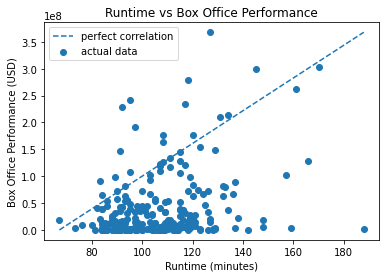

In [57]:
# scatter plot of the correlation
fig, ax = plt.subplots()



ax.scatter(df2['runtime_clean'], df2['box_office_clean'], label="actual data")



x_bounds = [min(df2['runtime_clean']), max(df2['runtime_clean'])]
y_bounds = [min(df2['box_office_clean']), max(df2['box_office_clean'])]



ax.plot(x_bounds, y_bounds, "--", label="perfect correlation")



ax.set_title("Runtime vs Box Office Performance")
ax.set_xlabel("Runtime (minutes)")
ax.set_ylabel("Box Office Performance (USD)")



ax.legend();

print(f' low to medium correlation of 0.312')

There is a medium correlation between the run time of a film to its box office performance
We can conclude that there are other factors in play that contribute to box office performance other than run time.

In [45]:
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 1 to 1545
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                235 non-null    int64 
 1   synopsis          235 non-null    object
 2   rating            235 non-null    object
 3   genre             235 non-null    object
 4   director          235 non-null    object
 5   writer            235 non-null    object
 6   theater_date      235 non-null    object
 7   dvd_date          235 non-null    object
 8   currency          235 non-null    object
 9   box_office        235 non-null    object
 10  runtime           235 non-null    object
 11  studio            235 non-null    object
 12  runtime_clean     235 non-null    object
 13  box_office_clean  235 non-null    object
dtypes: int64(1), object(13)
memory usage: 27.5+ KB


In [46]:
# counting the total number of null values in the dataset
print(original_rt_movie_info.isnull().sum())

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64


In [47]:
# counting the none-null values in the rating column
original_rt_movie_info['rating'].count()

1557

In [48]:
# creating a new dataframe of just the rating and the box office performance
df3 = rt_movie_info[['box_office_clean','rating']].copy()

In [49]:
rt_movie_info['rating']

1           R
6       PG-13
7           R
15          R
18      PG-13
        ...  
1530       PG
1537       NR
1541    PG-13
1542       NR
1545        R
Name: rating, Length: 235, dtype: object

Hypothesis test for runtime and box office performance

Two-tailed Independent T-test: Does a linear relationship exist between runtime and box office performance?

Null: Runtime and box office performance are independent of each other
Alternative: Runtime and box office performance are dependent